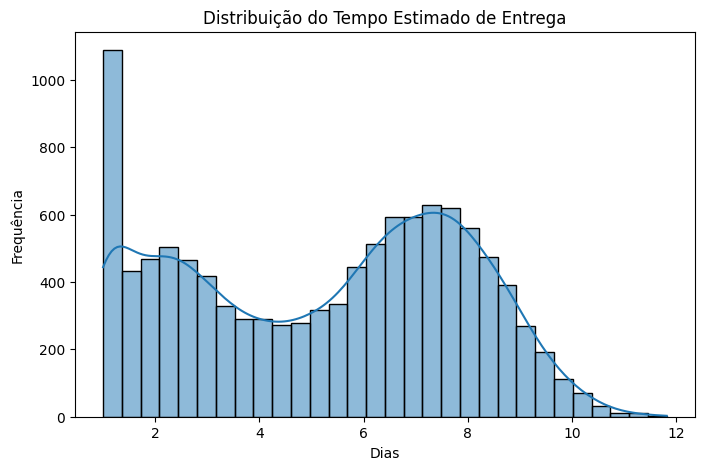

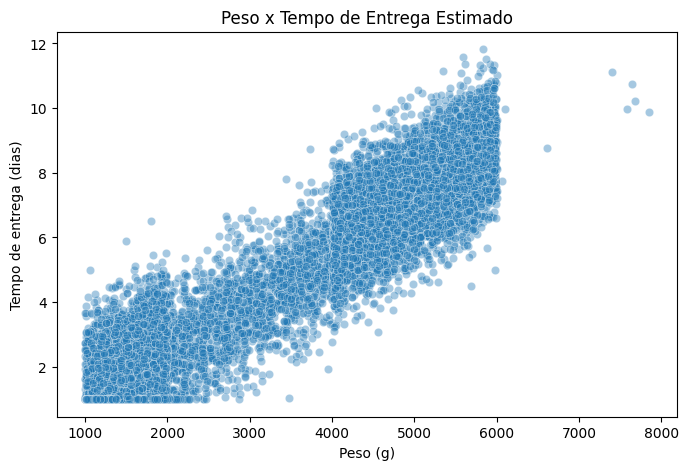

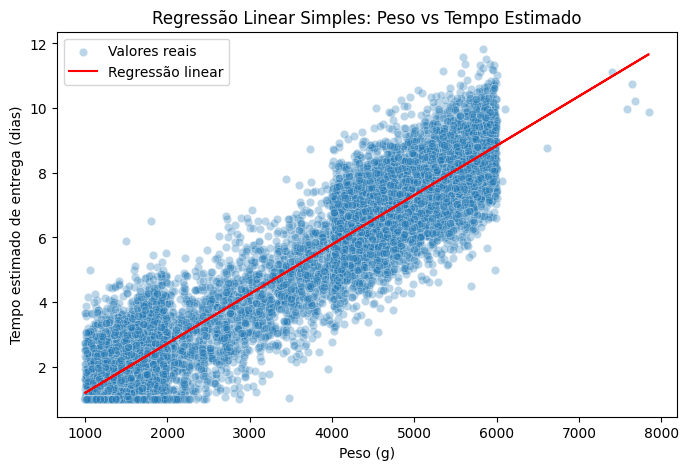

Intercepto (β0): -0.33638298826774093
Coeficiente (β1): 0.001529494252342209

Erro Quadrático Médio (MSE): 0.98
Coeficiente de Determinação (R²): 0.865


In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregando os dados
df = pd.read_csv("Train.csv")  # Altere o caminho conforme necessário

# Criando a variável-alvo contínua (tempo estimado)
df["Delivery_time_estimated"] = (df["Weight_in_gms"] / 1000) * 1.5 - (df["Discount_offered"] / 100) * 2
np.random.seed(42)
df["Delivery_time_estimated"] += np.random.normal(loc=0, scale=1, size=len(df))
df["Delivery_time_estimated"] = df["Delivery_time_estimated"].apply(lambda x: max(1, round(x, 2)))

# Limpeza e Tratamento
#print("Valores nulos por coluna:")
#print(df.isnull().sum())

# Verificando tipos de dados
#print("\nTipos de dados:")
#print(df.dtypes)

# Análise Exploratória
plt.figure(figsize=(8,5))
sns.histplot(df["Delivery_time_estimated"], bins=30, kde=True)
plt.title("Distribuição do Tempo Estimado de Entrega")
plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.show()

# Relação entre Peso e Tempo de Entrega
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Weight_in_gms", y="Delivery_time_estimated", alpha=0.4)
plt.title("Peso x Tempo de Entrega Estimado")
plt.xlabel("Peso (g)")
plt.ylabel("Tempo de entrega (dias)")
plt.show()

# Regressão Linear Simples
X = df[["Weight_in_gms"]]  # Variável explicativa
y = df["Delivery_time_estimated"]  # Variável alvo

model = LinearRegression()
model.fit(X, y)

# Predições
y_pred = model.predict(X)

# Avaliação do modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualização da regressão
plt.figure(figsize=(8,5))
sns.scatterplot(x=X["Weight_in_gms"], y=y, alpha=0.3, label="Valores reais")
plt.plot(X, y_pred, color="red", label="Regressão linear")
plt.title("Regressão Linear Simples: Peso vs Tempo Estimado")
plt.xlabel("Peso (g)")
plt.ylabel("Tempo estimado de entrega (dias)")
plt.legend()
plt.show()

# Coeficientes
print("Intercepto (β0):", model.intercept_)
#Intercepto (valor com tempo = 0), aprox = -0.34 dias.
print("Coeficiente (β1):", model.coef_[0])
#β1 mostra o quando o tempo de entrega aumenta para cada 1g a mais de peso
#Para 1000g, o tempo de entrega aumenta em cerca de 1,53 dias no nosso caso.
print("\nErro Quadrático Médio (MSE):", round(mse, 2))
#MSE indica o erro, o nosso erro está em aproximadamente 0.98 ou um dia.
print("Coeficiente de Determinação (R²):", round(r2, 3))
#O nosso valor de R² é de 0.865 ou seja, 86,5% da variação no tempo de entrega
#Pode ser explicada apenas pela variação do peso.
